In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_excel('restaurant_food_cost.xlsx')
df.head(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
# Making RATING column integer type
rates=list(df['RATING'])

for i in range(len(rates)):
    try:
        rates[i]=int(rates[i].split(".")[0].strip())
    except:
        pass

In [70]:
#rates

In [5]:
#Making VOTES column integer type
votes=list(df['VOTES'])

for i in range(len(votes)):
    try:
        votes[i]=int(votes[i].split(" ")[0].strip())
    except:
        pass

In [195]:
#votes


In [6]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [7]:
titles=list(df['TITLE'])
cuisines=list(df['CUISINES'])
cities=list(df['CITY'])
costs=list(df['COST'])

In [8]:
d ={'RATES':rates,'VOTES':votes,'TITLES':titles,'CUISINES':cuisines,'CITY':cities,'COST':costs}

In [9]:
df1 = pd.DataFrame(d)

In [10]:
df1.shape

(12690, 6)

In [11]:
df1.isnull().sum()

RATES          2
VOTES       1204
TITLES         0
CUISINES       0
CITY         112
COST           0
dtype: int64

In [12]:
df1['VOTES'].fillna((df1['VOTES'].median()),inplace=True)

In [13]:
df1['RATES'].replace('-',np.NaN,inplace=True)

In [14]:
df1['RATES'].replace('NEW',np.NaN,inplace=True)

In [15]:
df1['RATES'].fillna((df1['RATES'].median()),inplace=True)

In [16]:
df1['CITY'].fillna((df['CITY'].mode().values[0]),inplace=True)

In [17]:
df1.isnull().sum()

RATES       0
VOTES       0
TITLES      0
CUISINES    0
CITY        0
COST        0
dtype: int64

In [100]:
#counting total no. of titles and cuisines in df

In [18]:
df1['TITLES'] = df1['TITLES'].apply(lambda x : x.split(','))

In [19]:
df1['tot_titles'] = df1['TITLES'].apply(len)

In [20]:
df1['CUISINES'] = df1['CUISINES'].apply(lambda x : x.split(', '))

In [21]:
df1['tot_cuisines'] = df1['CUISINES'].apply(len)

In [22]:
df1.shape

(12690, 8)

In [23]:
#lets check max and min of every numeric column

In [24]:
df1.head(2)

,RATES,VOTES,TITLES,CUISINES,CITY,COST,tot_titles,tot_cuisines
0,3.0,49.0,[CASUAL DINING],"[Malwani, Goan, North Indian]",Thane,1200,1,3
1,4.0,30.0,"[CASUAL DINING, BAR]","[Asian, Modern Indian, Japanese]",Chennai,1500,2,3


In [25]:
max(df1['RATES'])

4.0

In [26]:
min(df1['RATES'])

2.0

In [27]:
max(df1['VOTES'])

41186.0

In [28]:
min(df1['VOTES'])

4.0

In [29]:
max(df1['COST'])

14000

In [342]:
min(df1['COST'])

20

In [30]:
df1.dtypes

RATES           float64
VOTES           float64
TITLES           object
CUISINES         object
CITY             object
COST              int64
tot_titles        int64
tot_cuisines      int64
dtype: object

In [31]:
max(df1['tot_titles'])

2

In [32]:
max(df1['tot_cuisines'])

8

In [34]:
min(df1['tot_titles'])

1

In [35]:
min(df1['tot_cuisines'])

1

In [36]:
#Lets describe the data statistically
df1.describe()

,RATES,VOTES,COST,tot_titles,tot_cuisines
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,3.282900,391.696217,655.252246,1.116785,2.545942
std,0.537973,805.157717,627.003540,0.321176,1.336211
min,2.000000,4.000000,20.000000,1.000000,1.000000
25%,3.000000,64.000000,300.000000,1.000000,2.000000
50%,3.000000,163.000000,500.000000,1.000000,2.000000
75%,4.000000,405.000000,800.000000,1.000000,3.000000
max,4.000000,41186.000000,14000.000000,2.000000,8.000000


In [37]:
#Lets check the correlation.
dfcor= df1.corr()
dfcor

,RATES,VOTES,COST,tot_titles,tot_cuisines
RATES,1.000000,0.319371,0.331911,0.171379,0.161495
VOTES,0.319371,1.000000,0.251294,0.156568,0.192477
COST,0.331911,0.251294,1.000000,0.215852,0.228341
tot_titles,0.171379,0.156568,0.215852,1.000000,0.181048
tot_cuisines,0.161495,0.192477,0.228341,0.181048,1.000000


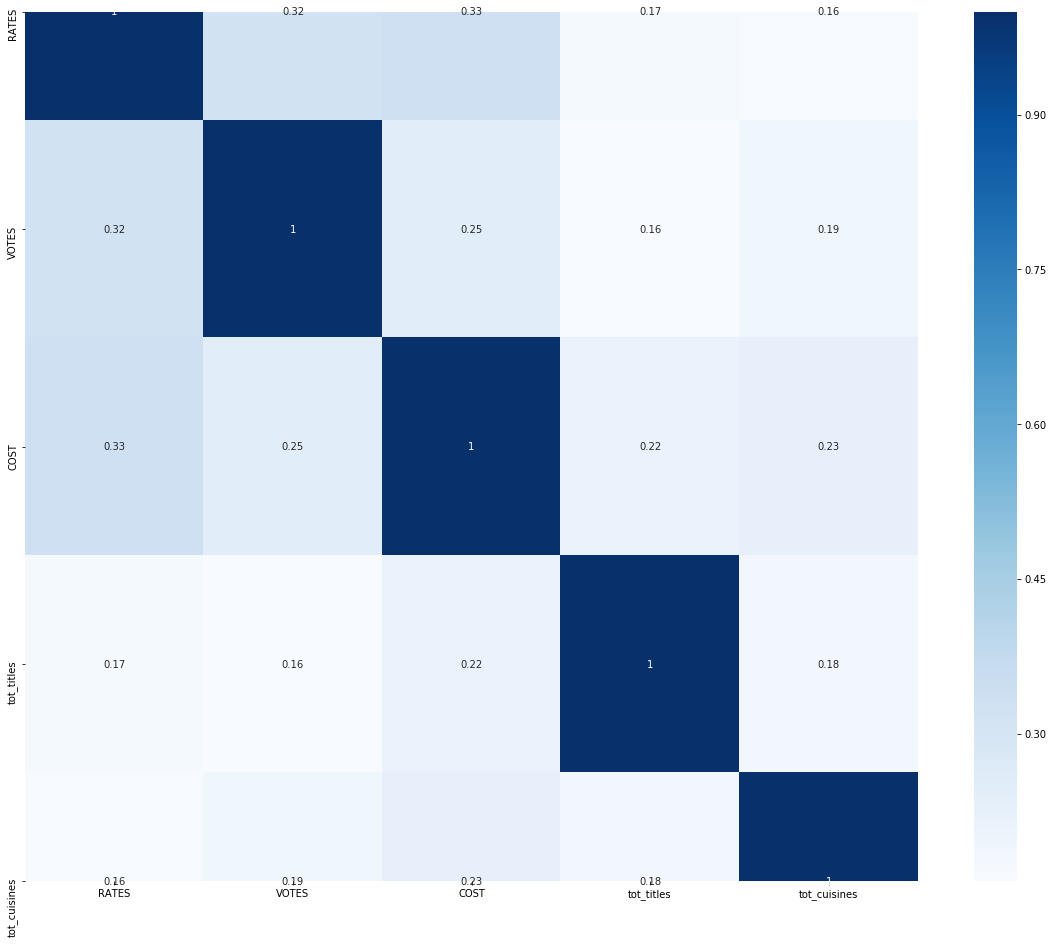

In [38]:
plt.figure(figsize = (20,16))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

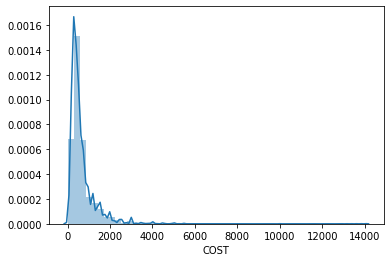

In [39]:
sns.distplot(df['COST'])

In [40]:
df1.skew()

RATES            0.094125
VOTES           14.788416
COST             3.978801
tot_titles       2.386698
tot_cuisines     0.937457
dtype: float64

In [41]:
df1['VOTES']=np.log(df1['VOTES'])

In [42]:
df1['COST']=np.log(df1['COST'])

In [43]:
df1['tot_titles']=np.log(df1['tot_titles'])

In [44]:
df1['tot_cuisines']=np.log(df1['tot_cuisines'])

In [45]:
df1.skew()

RATES           0.094125
VOTES          -0.049298
COST            0.392350
tot_titles      2.386698
tot_cuisines   -0.139012
dtype: float64

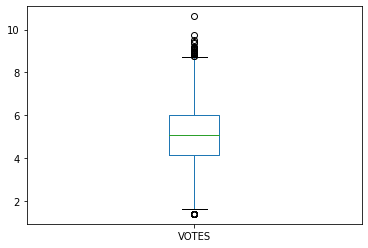

In [46]:
df1['VOTES'].plot.box()


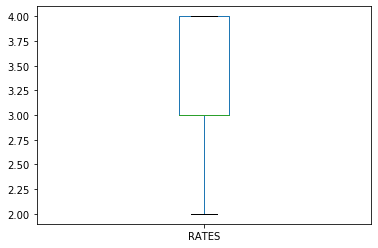

In [47]:
df1['RATES'].plot.box()

In [48]:
df1.dtypes

RATES           float64
VOTES           float64
TITLES           object
CUISINES         object
CITY             object
COST            float64
tot_titles      float64
tot_cuisines    float64
dtype: object

In [49]:
#lets first convert all categorial values into numerical values

In [50]:
le = LabelEncoder()
list1 = ['TITLES','CUISINES','CITY']
for val in list1:
    df1[val] = le.fit_transform(df1[val].astype(str))

In [51]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.52588318, 0.86947154, 0.75372327, ..., 1.23329902, 0.36363028,
        0.5622556 ],
       [1.33301865, 1.2297652 , 1.05600627, ..., 1.54209717, 2.75004601,
        0.5622556 ],
       [0.52588318, 0.23672551, 0.75372327, ..., 0.67219441, 0.36363028,
        1.09449646],
       ...,
       [1.33301865, 0.9799064 , 0.33449556, ..., 1.34406646, 0.36363028,
        1.09449646],
       [0.52588318, 1.18237071, 0.75372327, ..., 0.28702026, 0.36363028,
        1.09449646],
       [0.52588318, 1.05884741, 0.75372327, ..., 0.27408435, 0.36363028,
        0.18789575]])

In [52]:
threshold=3
print(np.where(z>3))

(array([  196,   235,   337,   563,   839,  1185,  1281,  1422,  1470,
        1475,  1916,  1931,  2488,  2531,  2610,  2689,  2740,  2940,
        3197,  3211,  3551,  3554,  3730,  3962,  4558,  4578,  4728,
        4931,  5108,  5502,  5944,  5975,  6154,  6475,  6505,  6519,
        6690,  6804,  7165,  7262,  7784,  7883,  7988,  8078,  8106,
        8143,  8907,  9088,  9132,  9578,  9609,  9830, 10546, 10914,
       11129, 11521, 11785, 11972, 12271, 12352], dtype=int64), array([1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64))


In [54]:
df_new=df1[((z<3).all(axis=1))] #Removing the outliers
df_new.head(5)

,RATES,VOTES,TITLES,CUISINES,CITY,COST,tot_titles,tot_cuisines
0,3.0,3.891820,42,2626,320,7.090077,0.000000,1.098612
1,4.0,3.401197,32,287,67,7.313220,0.693147,1.098612
2,3.0,5.398163,42,2973,67,6.684612,0.000000,1.386294
3,4.0,3.178054,105,4134,222,6.684612,0.000000,0.693147
4,3.0,5.105945,58,1818,222,5.703782,0.000000,0.000000


In [55]:
df1.shape

(12690, 8)

In [56]:
df_new.shape

(12630, 8)

In [57]:
x =df_new[['RATES','VOTES','TITLES','CUISINES','tot_titles','tot_cuisines','CITY']]

In [58]:
x.shape

(12630, 7)

In [59]:
 y = df_new[['COST']]

In [60]:
y.shape

(12630, 1)

In [61]:
#Scaling the input variable
#Algorithm requires all features to be on common scale

In [62]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x = scale.fit_transform(x)

In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_r_score = 0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print('max r2 score corresponding to',final_r_state,'is',max_r_score)

max r2 score corresponding to 67 is 0.37630200569857264


In [64]:

from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring ='r2').mean()

0.3455638108181631

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 81,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)

In [66]:
lreg.score(x_train,y_train)

0.34744309423745523

In [67]:
print('error')
print('Mean squared:', mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score:',r2_score(y_test,pred))

error
Mean squared: 0.435893260194932
Mean Squared error: 0.3254146637571923
Root Mean Squared Error: 0.5704512807919642
r2 score: 0.3457291588527709


In [69]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators = 200, random_state = 45)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9479310202907222

In [70]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(rf,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.67601989 0.67426311 0.67547167 0.67302439 0.70001241]
0.6797582912852682
0.010179612276118502


In [72]:
from sklearn.ensemble import GradientBoostingRegressor
gd = GradientBoostingRegressor()
gd.fit(x_train,y_train)
gd.score(x_test,y_test)

0.6685145408917853

In [73]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
ada.score(x_train,y_train)

0.4506553199033292

In [74]:
model = [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]

In [77]:
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    print('score',score)

score 0.34744309423745523
score 0.9320812638601869
score 0.692665129047773
score 0.4397309840122196


In [78]:
from sklearn.externals import joblib
joblib.dump(rf,'rfresfoodcost.obj')
rf_from_joblib = joblib.load('rfresfoodcost.obj')
rf_from_joblib.predict(x_test)

array([6.14010706, 4.94373787, 5.63014499, ..., 5.12323022, 6.52494312,
       6.24789705])